# Import Libraries

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Mount GoogleDrive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Covid Dataset

In [3]:
cnfrm_df = pd.read_csv('/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/time_series_covid_19_deaths.csv')
recvrd_df = pd.read_csv('/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/time_series_covid_19_recovered.csv')

In [10]:
print("Confimrned Cases having shape of ",cnfrm_df.shape)
print("Death Cases having shape of ",deaths_df.shape)
print("Recovered Cases having shape of ",recvrd_df.shape)

Confimrned Cases having shape of  (266, 165)
Death Cases having shape of  (266, 165)
Recovered Cases having shape of  (253, 165)


In [9]:
cnfrm_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


In [6]:
cnfrm_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20'],
      dtype='object', length=165)

In [7]:
cnfrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 165 entries, Province/State to 6/30/20
dtypes: float64(2), int64(161), object(2)
memory usage: 343.0+ KB


# Data Wrangling

In [11]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
         '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', 
         '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', 
         '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
         '2/20/20','2/21/20','2/22/20','2/23/20','2/24/20','2/25/20','2/26/20',
'2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20',
'3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20',
'3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20','3/25/20','3/26/20',
        '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20',
        '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20',
        '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20',
       '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', 
        '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', 
        '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20',
       '6/15/20', '6/16/20', '6/17/20', '6/18/20','6/19/20', '6/20/20', 
        '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20']

cnfrm_df_long = cnfrm_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recvrd_df_long = recvrd_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

covid_table = pd.concat([cnfrm_df_long, deaths_df_long['Deaths'], recvrd_df_long['Recovered']], 
                       axis=1, sort=False)
covid_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


In [ ]:
covid_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42826 entries, 0 to 42825
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  13041 non-null  object 
 1   Country/Region  42826 non-null  object 
 2   Lat             42826 non-null  float64
 3   Long            42826 non-null  float64
 4   Date            42826 non-null  object 
 5   Confirmed       42826 non-null  int64  
 6   Deaths          42826 non-null  int64  
 7   Recovered       40733 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.6+ MB


From the above dataset, we can see null values and invalid datypes for the columns.  
So, Data Cleaning and Data Preprocessing need to be performed on the dataset.

# Data Cleaning and Preprocessing


**Renaming the columns**

In [ ]:
covid_table.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'}, inplace=True)

In [ ]:
# Checking the null values in dataframe
# print(covid_table.isnull().sum()) 

In [ ]:
# covid_table[covid_table.isna().any(axis=1)]

**Fill Null Values**

In [ ]:
# fill null (or) missing values with 0 in column 'Recovered'
covid_table[['Recovered']] = covid_table[['Recovered']].fillna(0)

# fill NaN values with "NA" in column 'State'
covid_table[['State']] = covid_table[['State']].fillna('NA')

In [ ]:
# Validating the null values after cleaning dataframe
# print(covid_table.isnull().sum()) 

In [ ]:
# Checking the datatypes of the dataframe
# covid_table.dtypes

**Modify Columns Datatype**

In [ ]:
# converting Date column to proper data format
covid_table['Date'] = pd.to_datetime(covid_table['Date'])

# converting "Recovered" datype column into Int datatype
covid_table['Recovered'] = covid_table['Recovered'].astype('int')

In [ ]:
# Validating the datatypes of the dataframe
# covid_table.dtypes

In [ ]:
# Reading the dataset information after Data Preprocessing
covid_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42826 entries, 0 to 42825
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   State      42826 non-null  object        
 1   Country    42826 non-null  object        
 2   Lat        42826 non-null  float64       
 3   Long       42826 non-null  float64       
 4   Date       42826 non-null  datetime64[ns]
 5   Confirmed  42826 non-null  int64         
 6   Deaths     42826 non-null  int64         
 7   Recovered  42826 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


In [ ]:
# Checking whether is there any Uncertainity or Inconsistance in data
for col in covid_table:
  print(col,covid_table[col].unique(),"\n")

State ['NA' 'Australian Capital Territory' 'New South Wales'
 'Northern Territory' 'Queensland' 'South Australia' 'Tasmania' 'Victoria'
 'Western Australia' 'Alberta' 'British Columbia' 'Grand Princess'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador' 'Nova Scotia'
 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Anhui'
 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi' 'Guizhou'
 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang' 'Faroe Islands' 'Greenland'
 'French Guiana' 'French Polynesia' 'Guadeloupe' 'Mayotte' 'New Caledonia'
 'Reunion' 'Saint Barthelemy' 'St Martin' 'Martinique' 'Aruba' 'Curacao'
 'Sint Maarten' 'Bermuda' 'Cayman Islands' 'Channel Islands' 'Gibraltar'
 'Isle of Man' 'Montserrat' 'Diamond Princess' 'Northwest Territories'
 'Yukon' 'Ang

In [ ]:
# derived dataframes
china = covid_table[covid_table['Country']=='China']
row = covid_table[covid_table['Country']!='China']

covid_latest = covid_table[covid_table['Date'] == max(covid_table['Date'])].reset_index()
china_latest = covid_latest[covid_latest['Country']=='China']
row_latest = covid_latest[covid_latest['Country']!='China']

covid_latest_grouped = covid_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_grouped = china_latest.groupby('State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


<ipython-input-21-16786c854e46>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_latest_grouped = covid_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
<ipython-input-21-16786c854e46>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china_latest_grouped = china_latest.groupby('State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
<ipython-input-21-16786c854e46>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  row_latest_grouped = row_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


# Exploratory Data Analysis

**Current Scenario for the latest Date**

In [ ]:
temp = covid_latest.groupby(['Country', 'State'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')

<ipython-input-22-060b7172cd41>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = covid_latest.groupby(['Country', 'State'])['Confirmed', 'Deaths', 'Recovered'].max()


,,Confirmed,Deaths,Recovered
Country,State,,,
Afghanistan,NA,31517,746,0
Albania,NA,2535,62,0
Algeria,NA,13907,912,0
Andorra,NA,855,52,0
Angola,NA,284,13,0
Antigua and Barbuda,NA,69,3,0
Argentina,NA,64530,1307,0
Armenia,NA,25542,443,0
Australia,Australian Capital Territory,108,3,0


**Top 10 Countries with most no. of Confirmed cases and Death cases**

In [ ]:
t10_cnfrm = covid_latest_grouped[['Country', 'Confirmed']].sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
t10_cnfrm.head(10).style.background_gradient(cmap='Pastel1_r')

,Country,Confirmed
0,US,2635417
1,Brazil,1402041
2,Russia,646929
3,India,585481
4,United Kingdom,314160
5,Peru,285213
6,Chile,279393
7,Spain,249271
8,Italy,240578
9,Iran,227662




*   Most of the positive cases were found in USA followed by Brazil and Russia
*   Few countries are infact the neigbouring counries of China.
*   India has a positive cases of 585481 which is 4th highest among all countries.
*   Outside China, particularly more positive cases were found in Italy and Spain.










In [ ]:
t10_deaths = covid_latest_grouped[['Country', 'Deaths']].sort_values(by='Deaths', ascending=False).reset_index(drop=True)
t10_deaths.head(10).style.background_gradient(cmap='Pastel1_r')


,Country,Deaths
0,US,127417
1,Brazil,59594
2,United Kingdom,43815
3,Italy,34767
4,France,29846
5,Spain,28355
6,Mexico,27769
7,India,17400
8,Iran,10817
9,Belgium,9747




*   Similar to positive cases, Most of the deaths cases were found in USA followed by Brazil and UK which is 3rd higest in deaths reported.
*   India has a total death cases of 17400 which is 7th highest among all countries.
*   Outside China, particularly more death cases were found in Italy and Spain.




# EDA on Recent Data

In [ ]:
full_table = pd.read_csv('/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
# print('Mainland China' in full_table['Province/State'].values)
# print('Grand Princess' in full_table['Province/State'].values)
# print('Cruise Ship' in full_table['Province/State'].values)

In [ ]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42021 entries, 0 to 42020
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  12558 non-null  object        
 1   Country/Region  42021 non-null  object        
 2   Lat             42021 non-null  float64       
 3   Long            42021 non-null  float64       
 4   Date            42021 non-null  datetime64[ns]
 5   Confirmed       42021 non-null  int64         
 6   Deaths          42021 non-null  int64         
 7   Recovered       42021 non-null  int64         
 8   Active          42021 non-null  int64         
 9   WHO Region      42021 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.2+ MB


**From the above information, Data Cleaning and Preprocessing need to be done on the new dataset** 



In [ ]:
# print(full_table.isnull().sum()) 

In [ ]:
# print(full_table['Active'].value_counts(dropna='False')) 

In [ ]:
# Defining COVID-19 cases as per classifications 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Defining Active Case: Active Case = confirmed - deaths - recovered
full_table['new Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']


In [ ]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,new Active
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
42016,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-30,714,13,236,465,Africa,465
42017,NaN,Yemen,15.552727,48.516388,2020-06-30,1158,312,488,358,Eastern Mediterranean,358
42018,NaN,Comoros,-11.645500,43.333300,2020-06-30,303,7,200,96,Africa,96
42019,NaN,Tajikistan,38.861034,71.276093,2020-06-30,5900,52,4506,1342,Europe,1342


In [ ]:
# full_table['Active'].equals(full_table['new Active'])

**Modify Column Names**

In [ ]:
# Rename the column names
full_table.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'}, inplace=True)

**Fill Null Values** 

In [ ]:
# filling missing values 
full_table[['State']] = full_table[['State']].fillna('')

In [ ]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42021 entries, 0 to 42020
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       42021 non-null  object        
 1   Country     42021 non-null  object        
 2   Lat         42021 non-null  float64       
 3   Long        42021 non-null  float64       
 4   Date        42021 non-null  datetime64[ns]
 5   Confirmed   42021 non-null  int64         
 6   Deaths      42021 non-null  int64         
 7   Recovered   42021 non-null  int64         
 8   Active      42021 non-null  int64         
 9   WHO Region  42021 non-null  object        
 10  new Active  42021 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 3.5+ MB


In [ ]:
# print(full_table.isnull().sum()) 

In [ ]:
# china and rest of china (row)
china = full_table[full_table['Country']=='China']
row = full_table[full_table['Country']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country']=='China']
row_latest = full_latest[full_latest['Country']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


<ipython-input-37-cc1b37363431>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_latest_grouped = full_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
<ipython-input-37-cc1b37363431>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china_latest_grouped = china_latest.groupby('State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
<ipython-input-37-cc1b37363431>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  row_latest_grouped = row_latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


In [ ]:
# Creating a consolidated table , which gives the country wise total defined cases

temp = full_table.groupby(['Country', 'State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')


<ipython-input-38-03adc3edf406>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_table.groupby(['Country', 'State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
<ipython-input-38-03adc3edf406>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-06-30 00:00:00,10475085,511237,5283066,4680782




*   From above, you can see more active cases till present date during first 6 months of covid data.
*   Also, there are more recovered cases than deaths



# Wuhan - China - Rest of the World

In [ ]:
fig.update_traces?

Object `fig.update_traces` not found.


In [ ]:
def location(row):
    if row['Country']=='China':
        if row['State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese States'
    else:
        return 'Rest of the World'

temp = full_latest.copy()
temp['Country'] = temp.apply(location, axis=1)
temp = temp.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Country', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()

fig = px.bar(temp, y='Country', x='Count', color='Case', barmode='group', orientation='h',
             height=500, width=1000, text='Count', title='Hubei - China - World', 
             color_discrete_sequence= ['red', 'green', 'orange'])
# color_discrete_sequence= ['#EF553B', '#00CC96', '#636EFA'])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

<ipython-input-40-c2df83e9624b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


In [ ]:
# print('Missouri' in full_table['State'].values)

In [ ]:
# # Checking whether is there any Uncertainity or Inconsistance in data
# for col in full_table:
#   if col == 'Country':
#     print(col,full_table[col].unique(),"\n")

In [ ]:
#  Checking whether is there any Uncertainity or Inconsistance in data
for col in full_table:
  print(col,full_table[col].unique(),"\n")

State ['' 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Anhui' 'Beijing'
 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi' 'Guizhou' 'Hainan'
 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang' 'Faroe Islands' 'Greenland'
 'French Guiana' 'French Polynesia' 'Guadeloupe' 'Mayotte' 'New Caledonia'
 'Reunion' 'Saint Barthelemy' 'St Martin' 'Martinique' 'Aruba' 'Curacao'
 'Sint Maarten' 'Bermuda' 'Cayman Islands' 'Channel Islands' 'Gibraltar'
 'Isle of Man' 'Montserrat' 'Northwest Territories' 'Yukon' 'Anguilla'
 'British Virgin Islands' 'Turks

In [ ]:
# g = full_table.groupby('Country')['State'].agg(['unique'])

# Covid Cases Count

In [ ]:
# Reading the dataset
data_covid_cnt= pd.read_csv("/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/covid_19_data.csv")
data_covid_cnt.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
# Let's look at the various columns
data_covid_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53927 entries, 0 to 53926
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              53927 non-null  int64  
 1   ObservationDate  53927 non-null  object 
 2   Province/State   32870 non-null  object 
 3   Country/Region   53927 non-null  object 
 4   Last Update      53927 non-null  object 
 5   Confirmed        53927 non-null  float64
 6   Deaths           53927 non-null  float64
 7   Recovered        53927 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.3+ MB


**From the above information, Data Cleaning and Preprocessing need to be done on the new dataset**

In [ ]:
data_covid_cnt.describe()

,SNo,Confirmed,Deaths,Recovered
count,53927.00000,53927.000000,53927.000000,53927.000000
mean,26964.00000,8629.160625,509.275558,3567.531812
std,15567.52832,28030.847686,2438.846476,20210.864799
min,1.00000,0.000000,0.000000,0.000000
25%,13482.50000,76.000000,1.000000,0.000000
50%,26964.00000,712.000000,11.000000,75.000000
75%,40445.50000,4039.500000,124.000000,985.000000
max,53927.00000,405843.000000,41128.000000,720631.000000


**Modify Column Names**

In [ ]:
data_covid_cnt.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'}, inplace=True)

**Fill Null Values**

In [ ]:
# filling missing values 
# data_covid_cnt[['State']] = data_covid_cnt[['State']].fillna('')

**Change the Column datatype**

In [ ]:
# converting 'ObservationDate' column to proper data format
data_covid_cnt['ObservationDate'] = data_covid_cnt['ObservationDate'].apply(pd.to_datetime)

# converting 'Last Update' column to proper data format
data_covid_cnt['Last Update'] = pd.to_datetime(data_covid_cnt['Last Update'])

# converting 'float' datatype columns into int data format
data_covid_cnt = data_covid_cnt.astype({'Confirmed': 'int', 'Deaths': 'int', 'Recovered': 'int'})

# Dropping 'SNo' which is not having having any impact 
data_covid_cnt.drop(['SNo'],axis=1,inplace=True)

In [ ]:
data_covid_cnt.head()

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [ ]:
data_covid_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53927 entries, 0 to 53926
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  53927 non-null  datetime64[ns]
 1   State            32870 non-null  object        
 2   Country          53927 non-null  object        
 3   Last Update      53927 non-null  datetime64[ns]
 4   Confirmed        53927 non-null  int64         
 5   Deaths           53927 non-null  int64         
 6   Recovered        53927 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 2.9+ MB


**Countries affected by the Coronavirus so far**

In [ ]:
countries = data_covid_cnt['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 

# Current Status Worldwide

In [ ]:
# Creating a dataframe with total no of confirmed cases for every country
countries_cnt = len(data_covid_cnt['Country'].value_counts())


cases = pd.DataFrame(data_covid_cnt.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,countries_cnt+1)

global_cases = cases[['Country','Confirmed']]
# global_cases.sort_values(by=['Confirmed'],ascending=True)
global_cases

,Country,Confirmed
1,Azerbaijan,1
2,"('St. Martin',)",2
3,Afghanistan,1005001
4,Albania,97617
5,Algeria,623538
...,...,...
219,Western Sahara,631
220,Yemen,27410
221,Zambia,60608
222,Zimbabwe,14638


In [ ]:
# print('Mainland China' in data_covid_cnt['Country'].values)

In [ ]:
# Replacing data from 'Mainland China' to 'China'
data_covid_cnt['Country'].replace({'Mainland China':'China'},inplace=True)

**China's Stats**

In [ ]:
China = data_covid_cnt[data_covid_cnt['Country']=='China']
China

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,2020-01-22 17:00:00,1,0,0
1,2020-01-22,Beijing,China,2020-01-22 17:00:00,14,0,0
2,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6,0,0
3,2020-01-22,Fujian,China,2020-01-22 17:00:00,1,0,0
4,2020-01-22,Gansu,China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...
53847,2020-06-30,Tianjin,China,2020-07-01 04:33:52,198,3,194
53848,2020-06-30,Tibet,China,2020-07-01 04:33:52,1,0,1
53912,2020-06-30,Xinjiang,China,2020-07-01 04:33:52,76,3,73
53920,2020-06-30,Yunnan,China,2020-07-01 04:33:52,185,2,183


# Seaborn Bar Plot

**Plot representation for Confirmed vs Recovered figures of States of China other than Hubei**

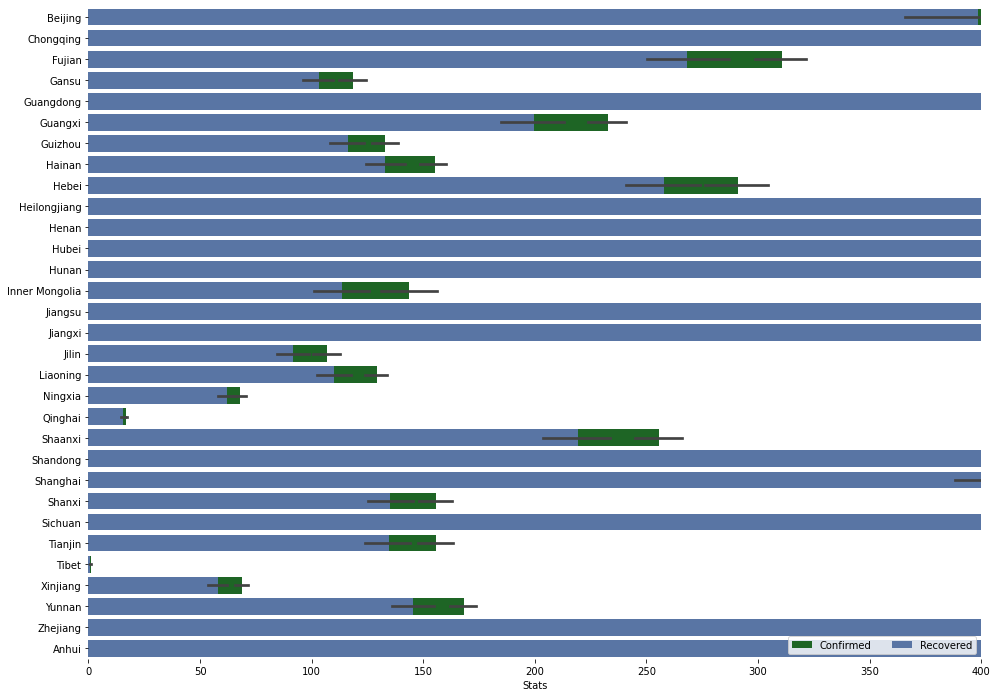

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(16, 12))

sns.set_color_codes("dark")
sns.barplot(x="Confirmed", y="State", data=China[1:],
            label="Confirmed", color="g")

sns.set_color_codes("deep")
sns.barplot(x="Recovered", y="State", data=China[1:],
            label="Recovered", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

From the above plot, if you take "Yunnan", there are nearly 170 confirmed cases out of which only 20 were recovered. Similarly, the plot indicates the same for th rest of the states.

# Correlation Plot

**Correlation heat map  between Confirmed, Death and Recovered Cases**

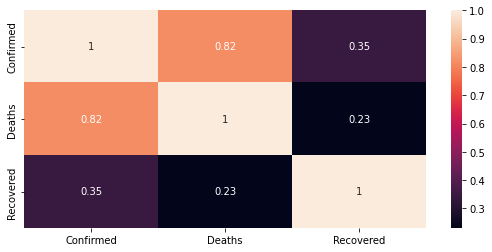

In [ ]:
#Get Correlation between different variables
corr = data_covid_cnt.corr(method='pearson')
plt.figure(figsize=(9,4))
sns.heatmap(corr, annot=True)

From Correlation heat map, Deaths are linearly correlated to the Confirmed Cases. As there is no vaccination or no proper treatment or no awareness resulted in high mortality rates in the initial stages.

# Pie Plots

In [ ]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
  labels=cnt_srs.index
  values=cnt_srs.values
  trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
  return trace

In [ ]:
# Inorder to execute plotly graphs in google colab, we need to run this method and call the method for every cell which is displaying a Plotly graph
# https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
data_covid_cnt.head()

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,2020-01-22 17:00:00,1,0,0
1,2020-01-22,Beijing,China,2020-01-22 17:00:00,14,0,0
2,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6,0,0
3,2020-01-22,Fujian,China,2020-01-22 17:00:00,1,0,0
4,2020-01-22,Gansu,China,2020-01-22 17:00:00,0,0,0


In [ ]:
# data_covid_cnt[data_covid_cnt['State']=="Hebei"].value_counts()

**Plotly visualization for State**

In [ ]:
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in googlecolab notebook

In [ ]:
enable_plotly_in_cell()
py.iplot([pie_plot(data_covid_cnt['State'].value_counts(), ['cyan', 'gold'], 'State')],image='jpeg')

Output hidden; open in https://colab.research.google.com to view.

**Plotly visualization for Country**



In [ ]:
enable_plotly_in_cell()
py.iplot([pie_plot(data_covid_cnt['Country'].value_counts(), ['cyan', 'gold'], 'Country')],image='png')

Output hidden; open in https://colab.research.google.com to view.

**Plotly visualization for Confirmed Cases**

In [ ]:
enable_plotly_in_cell()
py.iplot([pie_plot(data_covid_cnt['Confirmed'].value_counts(), ['cyan', 'gold'], 'Confirmed')],image='png')

Output hidden; open in https://colab.research.google.com to view.

**Plotly visualization for Death Cases**

In [ ]:
enable_plotly_in_cell()
py.iplot([pie_plot(data_covid_cnt['Deaths'].value_counts(), ['cyan', 'gold'], 'Deaths')],image='png')

Output hidden; open in https://colab.research.google.com to view.

**Plotly visualization for Recovered Cases**

In [ ]:
enable_plotly_in_cell()
py.iplot([pie_plot(data_covid_cnt['Recovered'].value_counts(), ['cyan', 'gold'], 'Recovered')],image='png')

Output hidden; open in https://colab.research.google.com to view.

The above Pie Plots representation shows the number of times that event i.e Confirmed, Deaths, Recovered Cases etc.. has been occured in the dataset which indicates the count corresponding to its percentage.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Location')

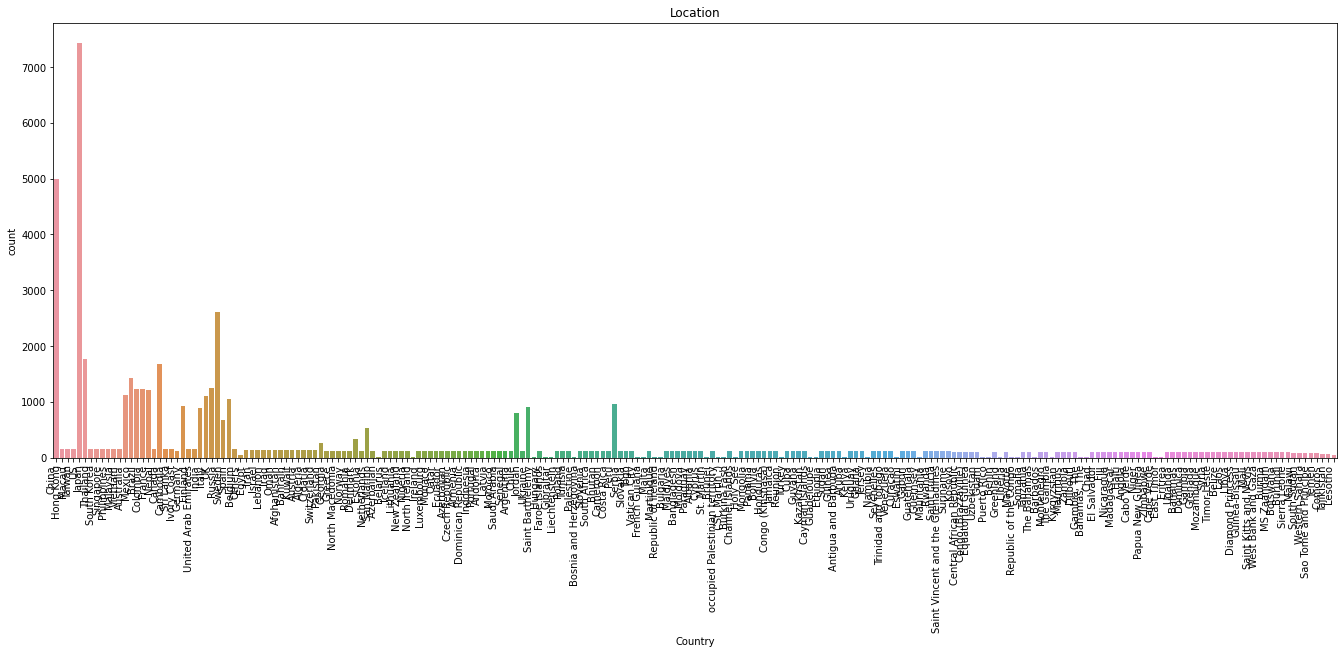

In [ ]:
# Location
sns.countplot(data_covid_cnt['Country'])
sns.countplot(data_covid_cnt['Country']).set_xticklabels(sns.countplot(data_covid_cnt['Country']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(23,8)
plt.title('Location')

The plot represents the count of each country in the dataset.

# Write the Processed Data to a CSV file for further Comperative Visualization

In [ ]:
# covid_globally = data_covid_cnt.groupby('ObservationDate')[['Confirmed','Deaths','Recovered']].sum().reset_index()
data_covid_cnt.to_csv("/content/gdrive/MyDrive/Novel Corona Virus 2019 Dataset/Processed/Covid_processed_data.csv",index=False)

# Global Spread of the Coronavirus Over Time

In [ ]:
data_covid_cnt['ObservationDate'] = pd.to_datetime(data_covid_cnt['ObservationDate'], format='%Y-%m-%d')
# data_covid_cnt['ObservationDate'] = pd.to_datetime(data_covid_cnt['ObservationDate'], errors='coerce')
# data_covid_cnt['ObservationDate'] = data_covid_cnt['ObservationDate'].dt.strftime('%m/%d')

In [ ]:
from datetime import date
data_covid_cnt['ObservationDate'] = data_covid_cnt['ObservationDate'].dt.date
spread = data_covid_cnt[data_covid_cnt['ObservationDate'] > pd.Timestamp(date(2020,1,21))]
spread_gl = spread.groupby('ObservationDate')[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
from plotly.subplots import make_subplots
#fig = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))

trace1 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.9)
data1 = [trace1];
layout = dict(title = 'Confirmed Cases Globally',
              xaxis= dict(title= 'Date',ticklen= 10,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
enable_plotly_in_cell()
fig = dict(data = data1, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
trace2 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.9)
data_covid_cnt2 = [trace2];
layout = dict(title = 'Deaths Cases Globally',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
enable_plotly_in_cell()
fig = dict(data = data_covid_cnt2, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
trace3 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.9)
data_covid_cnt3 = [trace3];
layout = dict(title = 'Recovered Cases  Globally',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
enable_plotly_in_cell()
fig = dict(data = data_covid_cnt3, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.